In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [13]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

punta arenas cl
hilo us
illoqqortoormiut gl
nizhneyansk ru
rikitea pf
rikitea pf
barentsburg sj
coihaique cl
kaitangata nz
camana pe
mataura pf
ushuaia ar
bira ru
nanortalik gl
hithadhoo mv
krasnoturansk ru
naze jp
samusu ws
coquimbo cl
thompson ca
broken hill au
cockburn town tc
tasiilaq gl
narsaq gl
tchaourou bj
barrow us
coquimbo cl
atuona pf
leningradskiy ru
avarua ck
bluff nz
arraial do cabo br
mentok id
santa cruz cr
chowchilla us
chuy uy
aklavik ca
blyth gb
kruisfontein za
new norfolk au
port alfred za
albany au
kodiak us
gedo et
victoria sc
hihifo to
albany au
bluff nz
punta arenas cl
la ronge ca
jamestown sh
new norfolk au
bengkulu id
punta arenas cl
lompoc us
yanam in
hobart au
punta arenas cl
tsihombe mg
nizhneyansk ru
constitucion mx
totness sr
balgazyn ru
panjab af
rikitea pf
kaitangata nz
agadez ne
ilhabela br
saint-pierre pm
sao sebastiao br
busselton au
busselton au
ndele cf
lakatoro vu
east london za
ushuaia ar
mahebourg mu
sayat tm
bar-le-duc fr
hilo us
calama cl
ushu

katsuura jp
busselton au
georgetown sh
lilongwe mw
jedrzejow pl
suntar ru
emerald au
punta arenas cl
richards bay za
roald no
kandrian pg
mar del plata ar
nouadhibou mr
bluff nz
dingle ie
chapais ca
hilo us
alta floresta br
castro cl
vardo no
nizhneyansk ru
kapaa us
vestmannaeyjar is
bluff nz
kapaa us
jamestown sh
shimoda jp
hermanus za
beringovskiy ru
rikitea pf
kendari id
taoudenni ml
leningradskiy ru
rikitea pf
tuktoyaktuk ca
taolanaro mg
la ronge ca
akdepe tm
nanortalik gl
taolanaro mg
kruisfontein za
umzimvubu za
cape town za
bethel us
riyadh sa
shingu jp
el retorno co
vaini to
thompson ca
taolanaro mg
bolshiye berezniki ru
mancora pe
kapaa us
airai pw
rocha uy
batemans bay au
sakhipur bd
yellowknife ca
castro cl
upernavik gl
nome us
taolanaro mg
constitucion mx
ribeira grande pt
kavieng pg
san quintin mx
astoria us
barentsburg sj
busselton au
taolanaro mg
busselton au
itarema br
upernavik gl
taolanaro mg
felidhoo mv
busselton au
illoqqortoormiut gl
hofn is
carnarvon au
martapura 

rapid valley us
yellowknife ca
hermanus za
mataura pf
soderhamn se
cidreira br
ushuaia ar
punta arenas cl
samarai pg
esperance au
port alfred za
cairns au
kiknur ru
taolanaro mg
saint-georges gf
vaini to
ribeira grande pt
coquimbo cl
punta arenas cl
abu kamal sy
upernavik gl
katsuura jp
avarua ck
barrow us
saleaula ws
bathsheba bb
punta arenas cl
hobart au
norman wells ca
port elizabeth za
butaritari ki
avarua ck
hofn is
rikitea pf
baykit ru
illoqqortoormiut gl
new norfolk au
sobolevo ru
ushuaia ar
cururupu br
puerto ayora ec
bredasdorp za
nabire id
casian ph
taolanaro mg
illoqqortoormiut gl
mys shmidta ru
qaanaaq gl
sovetsk ru
thompson ca
sarangani ph
pacific grove us
taolanaro mg
cherskiy ru
hilo us
half moon bay us
vrangel ru
cape town za
esperance au
mataura pf
ushuaia ar
sakakah sa
lagoa pt
bredasdorp za
bluff nz
mataura pf
vestmanna fo
mutsamudu km
east london za
albany au
beringovskiy ru
hobart au
chara ru
walvis bay na
karaul ru
sangar ru
padang id
ushuaia ar
talnakh ru
iqaluit

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Perform an API call with the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e7df366edd22deea4360c40b629d5169


In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dergachi
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | petlawad
Processing Record 6 of Set 1 | yumen
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | tual
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | husavik
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | sao joao da barra
Processing Record 22 of Set 1 | kandri

Processing Record 35 of Set 4 | qaanaaq
Processing Record 36 of Set 4 | bundaberg
Processing Record 37 of Set 4 | ksenyevka
City not found. Skipping...
Processing Record 38 of Set 4 | gimli
Processing Record 39 of Set 4 | santa cecilia
Processing Record 40 of Set 4 | moron
Processing Record 41 of Set 4 | riyadh
Processing Record 42 of Set 4 | corn island
Processing Record 43 of Set 4 | aswan
Processing Record 44 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | komsomolskiy
Processing Record 47 of Set 4 | acapulco
Processing Record 48 of Set 4 | hualmay
Processing Record 49 of Set 4 | namibe
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | vostok
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | yaan
Processing Record 4 of Set 5 | baruun-urt
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | grand gaube
Processing Rec

Processing Record 25 of Set 8 | coihaique
Processing Record 26 of Set 8 | chernyshevskiy
Processing Record 27 of Set 8 | southbridge
Processing Record 28 of Set 8 | camacha
Processing Record 29 of Set 8 | jawhar
Processing Record 30 of Set 8 | ulladulla
Processing Record 31 of Set 8 | haines junction
Processing Record 32 of Set 8 | adrar
Processing Record 33 of Set 8 | smithers
Processing Record 34 of Set 8 | muscat
Processing Record 35 of Set 8 | quang ngai
Processing Record 36 of Set 8 | dillon
Processing Record 37 of Set 8 | genhe
Processing Record 38 of Set 8 | willowmore
Processing Record 39 of Set 8 | tautira
Processing Record 40 of Set 8 | buala
Processing Record 41 of Set 8 | jaisalmer
Processing Record 42 of Set 8 | praia
Processing Record 43 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 8 | mandera
Processing Record 45 of Set 8 | enshi
Processing Record 46 of Set 8 | nouadhibou
Processing Record 47 of Set 8 | lavrentiya
Processing Record 48 of

City not found. Skipping...
Processing Record 13 of Set 12 | jahrom
City not found. Skipping...
Processing Record 14 of Set 12 | mogadishu
Processing Record 15 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 16 of Set 12 | coeneo
Processing Record 17 of Set 12 | oktyabrskoye
Processing Record 18 of Set 12 | karratha
Processing Record 19 of Set 12 | nara
Processing Record 20 of Set 12 | great bend
Processing Record 21 of Set 12 | nambucca heads
Processing Record 22 of Set 12 | tornio
Processing Record 23 of Set 12 | atar
Processing Record 24 of Set 12 | celestun
Processing Record 25 of Set 12 | mana
Processing Record 26 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 27 of Set 12 | buraydah
Processing Record 28 of Set 12 | ugoofaaru
Processing Record 29 of Set 12 | maragogi
Processing Record 30 of Set 12 | carnot
Processing Record 31 of Set 12 | phan rang
City not found. Skipping...
Processing Record 32 of Set 12 | kazalinsk
City not found. Sk

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dergachi,51.2328,48.7659,31.50,95,100,6.53,RU,2021-12-09 21:38:36
1,Dikson,73.5069,80.5464,-24.79,99,19,4.97,RU,2021-12-09 21:38:36
2,Punta Arenas,-53.1500,-70.9167,60.91,41,40,25.32,CL,2021-12-09 21:38:09
3,Airai,-8.9266,125.4092,62.65,85,92,1.07,TL,2021-12-09 21:38:37
4,Petlawad,23.0000,74.8000,62.24,56,5,10.33,IN,2021-12-09 21:38:38
5,Yumen,40.2833,97.2000,26.46,48,100,7.58,CN,2021-12-09 21:38:38
6,Atuona,-9.8000,-139.0333,78.44,63,77,13.96,PF,2021-12-09 21:38:39
7,Tual,-5.6667,132.7500,83.82,77,100,20.49,ID,2021-12-09 21:38:39
8,Saskylakh,71.9167,114.0833,-12.82,98,100,6.53,RU,2021-12-09 21:38:40
9,Husavik,66.0449,-17.3389,24.71,92,100,6.20,IS,2021-12-09 21:38:41


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]

In [22]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dergachi,RU,2021-12-09 21:38:36,51.2328,48.7659,31.50,95,100,6.53
1,Dikson,RU,2021-12-09 21:38:36,73.5069,80.5464,-24.79,99,19,4.97
2,Punta Arenas,CL,2021-12-09 21:38:09,-53.1500,-70.9167,60.91,41,40,25.32
3,Airai,TL,2021-12-09 21:38:37,-8.9266,125.4092,62.65,85,92,1.07
4,Petlawad,IN,2021-12-09 21:38:38,23.0000,74.8000,62.24,56,5,10.33
5,Yumen,CN,2021-12-09 21:38:38,40.2833,97.2000,26.46,48,100,7.58
6,Atuona,PF,2021-12-09 21:38:39,-9.8000,-139.0333,78.44,63,77,13.96
7,Tual,ID,2021-12-09 21:38:39,-5.6667,132.7500,83.82,77,100,20.49
8,Saskylakh,RU,2021-12-09 21:38:40,71.9167,114.0833,-12.82,98,100,6.53
9,Husavik,IS,2021-12-09 21:38:41,66.0449,-17.3389,24.71,92,100,6.20


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

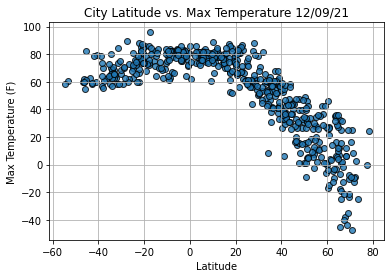

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

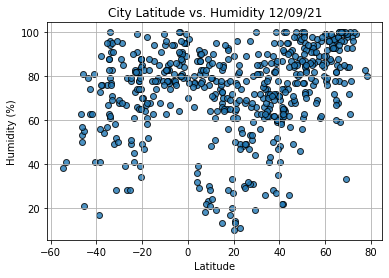

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

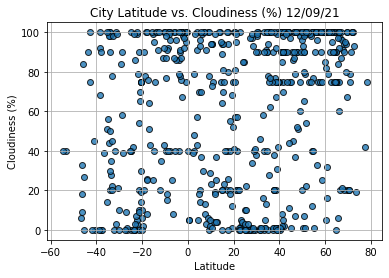

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

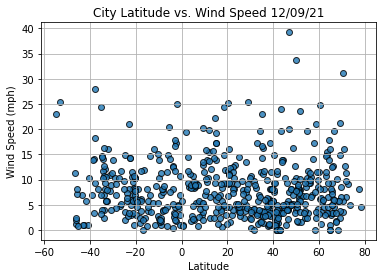

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dergachi,RU,2021-12-09 21:38:36,51.2328,48.7659,31.50,95,100,6.53
1,Dikson,RU,2021-12-09 21:38:36,73.5069,80.5464,-24.79,99,19,4.97
4,Petlawad,IN,2021-12-09 21:38:38,23.0000,74.8000,62.24,56,5,10.33
5,Yumen,CN,2021-12-09 21:38:38,40.2833,97.2000,26.46,48,100,7.58
8,Saskylakh,RU,2021-12-09 21:38:40,71.9167,114.0833,-12.82,98,100,6.53


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

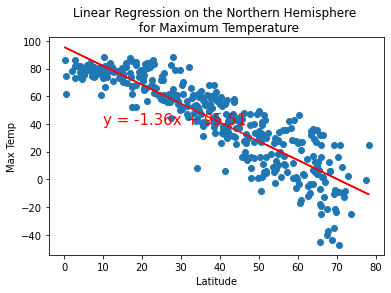

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

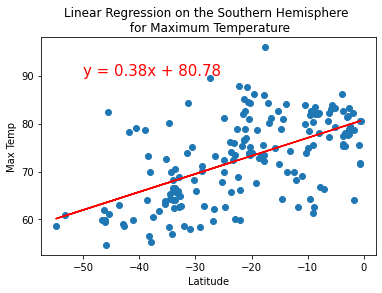

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

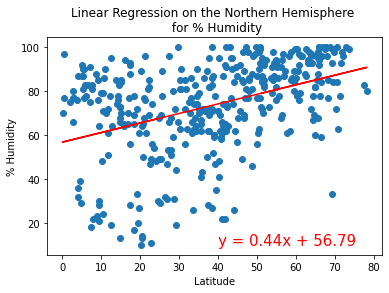

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

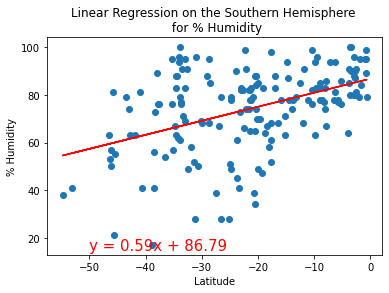

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

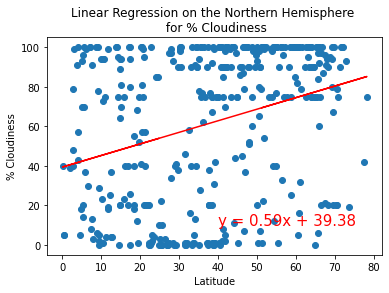

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

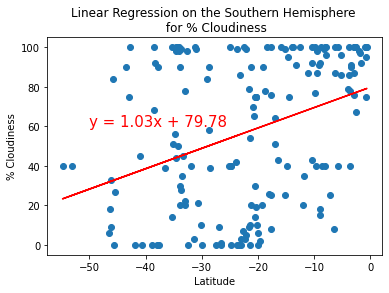

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

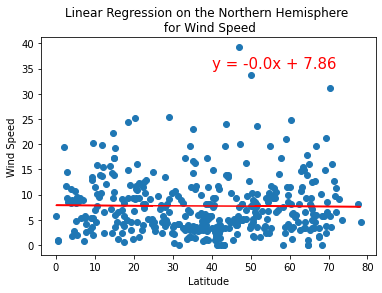

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

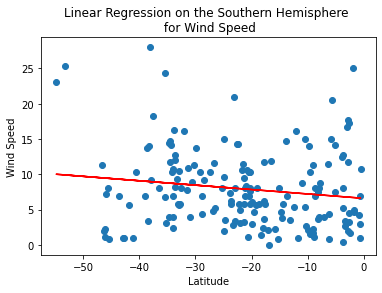

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

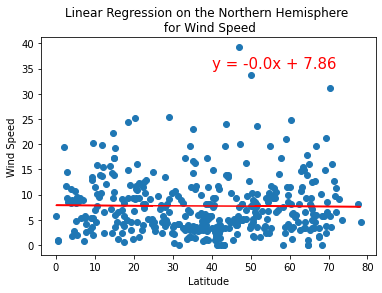

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

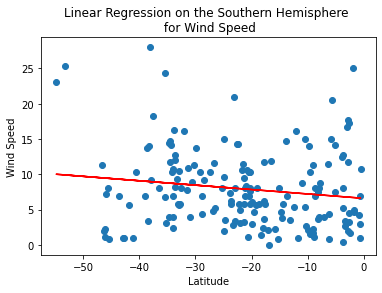

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))